In [165]:
import sys
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib notebook

In [2]:
filenames = glob.glob('training/*.psv')

In [9]:
# разбиение на пацинетов с патолгией и без
patient_1 = []
patient_0 = []
for l in filenames:
    data = pd.read_csv(l,delimiter='|')
    if sum(data.SepsisLabel) > 0:
        patient_1.append(l)
    else:
        patient_0.append(l)

In [52]:
# средние значения лактаты у пациентов с сепсисом в период до и во время сепсиса

mean_sick_0 = []
mean_sick_1 = []
for i in patient_1:
    data = pd.read_csv(i,delimiter='|')
    
    data_array_0 = np.array(data.Lactate[data.SepsisLabel == 0])
    data_array_0 = [x for x in data_array_0 if str(x) != 'nan']
    
    data_array_1 = np.array(data.Lactate[data.SepsisLabel == 1])
    data_array_1 = [x for x in data_array_1 if str(x) != 'nan']
    
    mean_sick_0.append(np.mean(data_array_0))
    mean_sick_1.append(np.mean(data_array_1))
    
#mean_sick_0 = [x for x in mean_sick_0 if str(x) != 'nan']
#mean_sick_1 = [x for x in mean_sick_1 if str(x) != 'nan']

mean_sick_0 = [x for x in mean_sick_0 if str(x) != 'nan']
mean_sick_1 = [x for x in mean_sick_1 if str(x) != 'nan']
print(np.mean(mean_sick_0))
print(np.mean(mean_sick_1))
plt.plot(mean_sick_0)
plt.plot(mean_sick_1,'y')
plt.show()

print(np.mean(mean_sick_0))
print(np.mean(mean_sick_1))

np.mean(mean_sick_1)

<IPython.core.display.Javascript object>


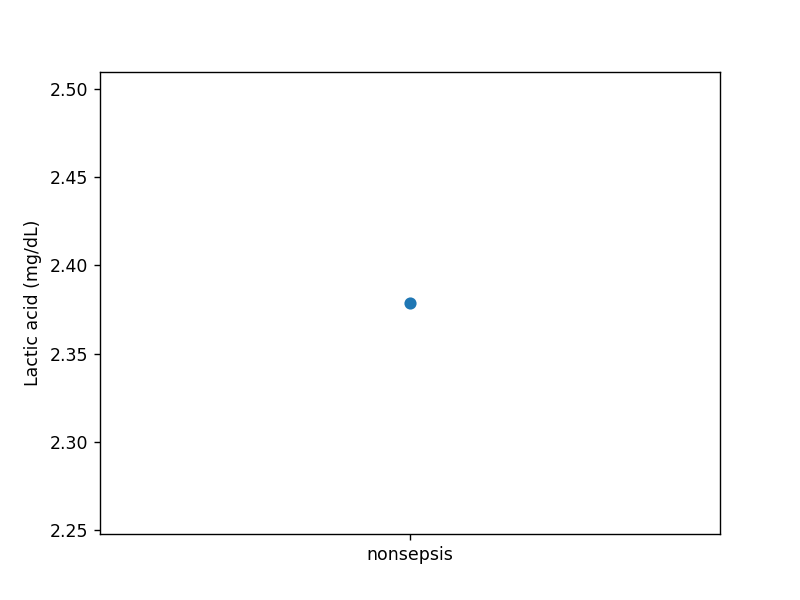

In [122]:
# график lactate здоровых пациентов

#plt.plot(1,np.mean(mean_sick_0),'o')
#plt.plot(2,np.mean(mean_sick_1),'o')
plt.plot(1,np.mean(mean_0),'o')
#plt.xlabel('time')
plt.ylabel('Lactic acid (mg/dL)')
points = np.array([1])
labels = [r'nonsepsis']
plt.xticks(points, labels)
#plt.title()
plt.show()

<IPython.core.display.Javascript object>


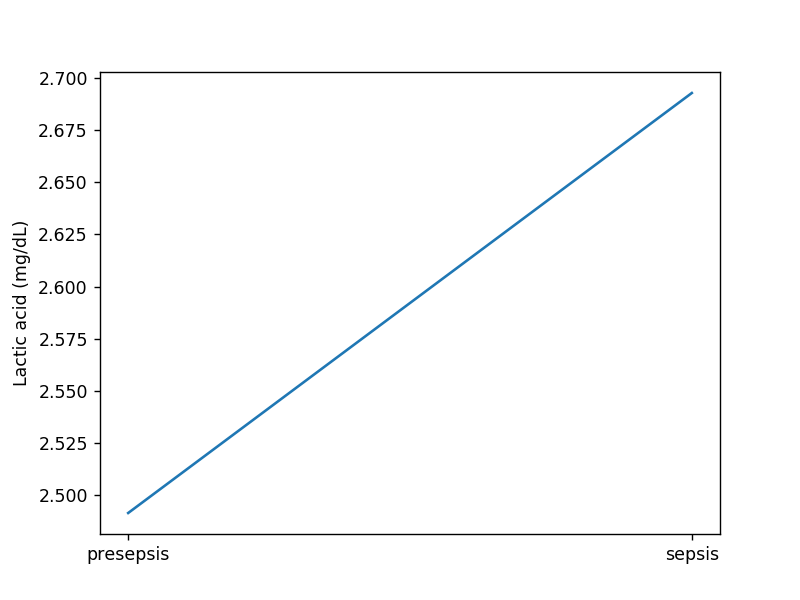

In [123]:
# график lactate пациентов с сепсисом

#plt.plot(1,np.mean(mean_sick_0),'o')
#plt.plot(2,np.mean(mean_sick_1),'o')
plt.plot([1,2],[np.mean(mean_sick_0),np.mean(mean_sick_1)])
#plt.xlabel('time')
plt.ylabel('Lactic acid (mg/dL)')
points = np.array([1,2])
labels = [r'presepsis', r'sepsis']
plt.xticks(points, labels)
#plt.title()
plt.show()


In [38]:
# среднее значение Lactate у здоровых пациентов

mean_0 = []
for i in patient_0:
    data = pd.read_csv(i,delimiter='|')
    
    mean_0.append(data.Lactate[data.SepsisLabel == 0].mean())
mean_0 = [x for x in mean_0 if str(x) != 'nan']